In [48]:
import pymysql
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

# 연결에 필요한 정보
rds_host = 'capstone-database.c5ys4ks8sbyz.us-west-2.rds.amazonaws.com'
rds_port = 3306
rds_user = 'admin'  
rds_password = 'capstone'  
rds_database = 'capstone'  

# MySQL 연결
conn = pymysql.connect(
    host=rds_host,
    port=rds_port,
    user=rds_user,
    password=rds_password,
    database=rds_database
)

In [49]:
# 샘플 쿼리 실행
with conn.cursor() as cursor:
    # 쿼리 작성
    query = "SELECT time, date, pop FROM Tokyo" # {table_name}
    
    # 쿼리 실행
    cursor.execute(query)
    
    # 결과 가져오기
    result = cursor.fetchall()
    
    # 결과 출력
    print(result)

((datetime.timedelta(seconds=32400), datetime.date(2024, 3, 13), 0.08), (datetime.timedelta(seconds=43200), datetime.date(2024, 3, 13), 0.32), (datetime.timedelta(seconds=54000), datetime.date(2024, 3, 13), 0.0), (datetime.timedelta(seconds=64800), datetime.date(2024, 3, 13), 0.0), (datetime.timedelta(seconds=75600), datetime.date(2024, 3, 13), 0.0), (datetime.timedelta(0), datetime.date(2024, 3, 14), 0.0), (datetime.timedelta(seconds=10800), datetime.date(2024, 3, 14), 0.0), (datetime.timedelta(seconds=21600), datetime.date(2024, 3, 14), 0.0), (datetime.timedelta(seconds=32400), datetime.date(2024, 3, 14), 0.0), (datetime.timedelta(seconds=43200), datetime.date(2024, 3, 14), 0.0), (datetime.timedelta(seconds=54000), datetime.date(2024, 3, 14), 0.0), (datetime.timedelta(seconds=64800), datetime.date(2024, 3, 14), 0.0), (datetime.timedelta(seconds=75600), datetime.date(2024, 3, 14), 0.0), (datetime.timedelta(0), datetime.date(2024, 3, 15), 0.0), (datetime.timedelta(seconds=10800), datet

In [50]:

# 데이터 처리
formatted_data = []
for item in result:
    # 시간과 날짜 추출
    time = item[0]  # timedelta
    date = item[1]  # date
    pop = item[2]
    
    # datetime 객체 생성
    datetime_obj = datetime.combine(date, datetime.min.time()) + time
    
    # 데이터 포맷 변경
    formatted_data.append((datetime_obj, pop))
    
# 데이터 정렬
formatted_data = sorted(formatted_data, key=lambda x: x[0])
for i in formatted_data:
    print(i)

(datetime.datetime(2024, 3, 13, 9, 0), 0.08)
(datetime.datetime(2024, 3, 13, 12, 0), 0.32)
(datetime.datetime(2024, 3, 13, 15, 0), 0.0)
(datetime.datetime(2024, 3, 13, 18, 0), 0.0)
(datetime.datetime(2024, 3, 13, 21, 0), 0.0)
(datetime.datetime(2024, 3, 14, 0, 0), 0.0)
(datetime.datetime(2024, 3, 14, 3, 0), 0.0)
(datetime.datetime(2024, 3, 14, 6, 0), 0.0)
(datetime.datetime(2024, 3, 14, 9, 0), 0.0)
(datetime.datetime(2024, 3, 14, 12, 0), 0.0)
(datetime.datetime(2024, 3, 14, 15, 0), 0.0)
(datetime.datetime(2024, 3, 14, 18, 0), 0.0)
(datetime.datetime(2024, 3, 14, 21, 0), 0.0)
(datetime.datetime(2024, 3, 15, 0, 0), 0.0)
(datetime.datetime(2024, 3, 15, 3, 0), 0.0)
(datetime.datetime(2024, 3, 15, 6, 0), 0.0)
(datetime.datetime(2024, 3, 15, 9, 0), 0.0)
(datetime.datetime(2024, 3, 15, 12, 0), 0.0)
(datetime.datetime(2024, 3, 15, 15, 0), 0.0)
(datetime.datetime(2024, 3, 15, 18, 0), 0.0)
(datetime.datetime(2024, 3, 15, 21, 0), 0.0)
(datetime.datetime(2024, 3, 16, 0, 0), 0.0)
(datetime.datetime

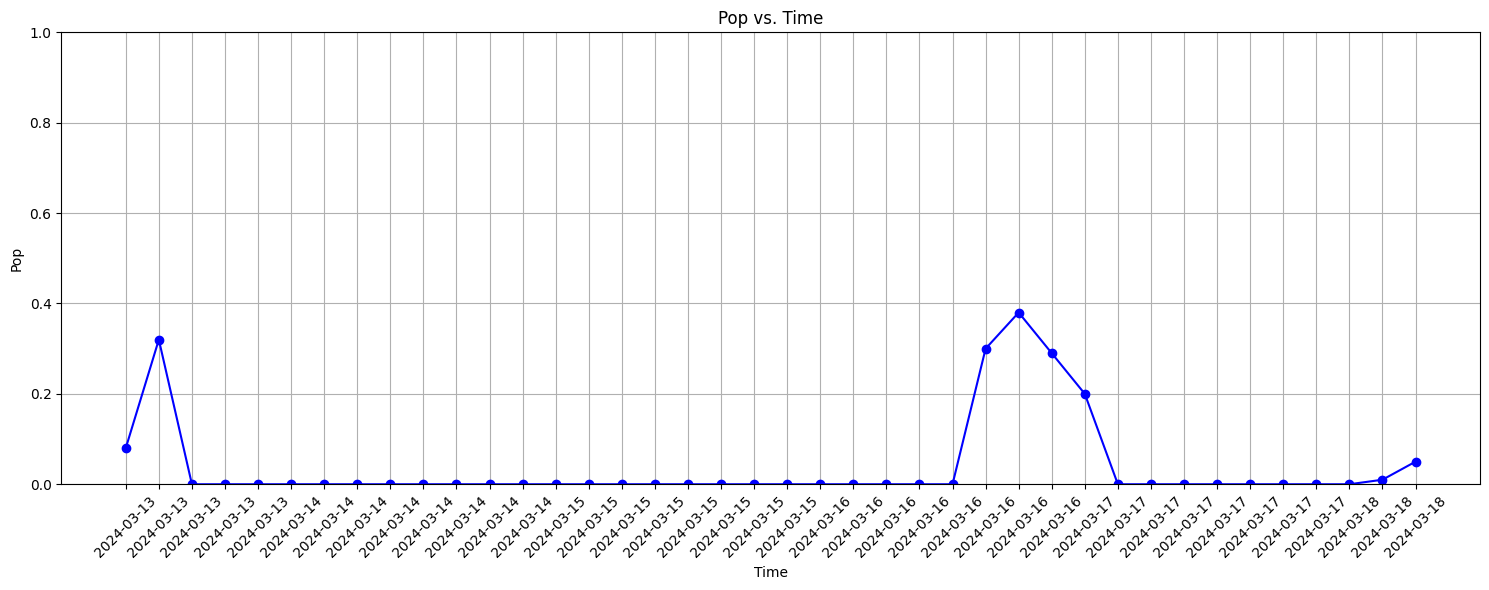

In [51]:
# Pandas DataFrame으로 변환
df = pd.DataFrame(formatted_data, columns=["Time", "Pop"])

# x 축과 y 축 데이터 추출
times = pd.to_datetime(df["Time"])
pops = df["Pop"]

# 그래프 생성
plt.figure(figsize=(15, 6))
plt.plot(times, pops, marker='o', color='blue')

# 그래프 설정
plt.xlabel("Time")
plt.ylabel("Pop")
plt.title("Pop vs. Time")
plt.grid(True)

# x 축 레이블 설정
plt.xticks(times, rotation=45)

# y 축 범위 설정
plt.ylim(ymin=0, ymax=1)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()